#연극 추천 프로그램 알고리즘
[연극리뷰평가] 현재 상영중인 158개 연극에서 1만명의 리뷰평가 데이터를 자체적으로 수집한 데이터에서 유효한 결과를 얻을 수 있는 2100명의 데이터를 활용해서 연극간의 피어슨상관계수 값을 계산하고 입력된 연극과 가장 높은 계수를 가진 연극을 상위 5개 추천하는 알고리즘.


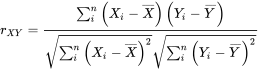

피어슨 상관계수 = x,y의 공분산 / x의 표준편차 * y의 표준편차

In [1]:
import numpy as np
import pandas as pd

In [2]:
def recommand(input_title):
  result = []
  for compare_title in data.columns:
      if compare_title == input_title:
          continue
      
      #피어슨상관계수
      input_c = data[input_title] - data[input_title].mean()
      compare_c = data[compare_title] - data[compare_title].mean()
      score = np.sum(input_c * compare_c) / np.sqrt(np.sum(input_c ** 2) * np.sum(compare_c ** 2))

      #유효한 값만 리스트에 담기
      if np.isnan(score):
          continue
      else:
          result.append( (compare_title, score) )   

  #상관계수가 높은 순서대로 정렬
  result.sort(key=lambda x: x[1], reverse=True)
  return pd.DataFrame(result[:5])

#데이터 불러오기
현재 상영중인 입력 가능한 연극리스트 출력

In [3]:
data = pd.read_csv("/content/drive/MyDrive/소프트융합캡스톤 공유폴더/2번이상 본 연극관객 2100명.csv", encoding='CP949')
print(data)

        id  2시간탈출  G급감성  강제결혼  공기없는세계  ...  태일  택시안에서  한뼘사이  한여름 밤의 꿈  핫식스
0        1    NaN   NaN   NaN     NaN  ... NaN    NaN   NaN       NaN  5.0
1        2    NaN   NaN   NaN     NaN  ... NaN    NaN   NaN       NaN  NaN
2        3    NaN   NaN   NaN     NaN  ... NaN    NaN   NaN       NaN  5.0
3        4    NaN   NaN   NaN     NaN  ... NaN    NaN   5.0       NaN  NaN
4        5    NaN   NaN   NaN     NaN  ... NaN    NaN   NaN       NaN  NaN
...    ...    ...   ...   ...     ...  ...  ..    ...   ...       ...  ...
2172  2173    NaN   NaN   NaN     NaN  ... NaN    NaN   NaN       NaN  NaN
2173  2174    NaN   NaN   NaN     NaN  ... NaN    NaN   NaN       NaN  NaN
2174  2175    NaN   NaN   NaN     NaN  ... NaN    NaN   NaN       NaN  NaN
2175  2176    NaN   NaN   NaN     NaN  ... NaN    NaN   NaN       NaN  NaN
2176  2177    NaN   NaN   NaN     NaN  ... NaN    NaN   NaN       NaN  NaN

[2177 rows x 43 columns]


In [6]:
print("현재 상영중인 입력 가능한 연극 리스트")
print(list(data.columns[1:]))

현재 상영중인 입력 가능한 연극 리스트
['2시간탈출', 'G급감성', '강제결혼', '공기없는세계', '그놈은예뻤다', '끝까지 간다', '나만빼고', '너의 목소리가 들려', '늘근 도둑이야기', '데스트랩', '리미트', '리어왕', '멈춰진 계절', '버스는 떠났다', '보잉보잉', '뷰티풀라이프', '빈센트 리버', '사랑일까', '쉬어매드니스', '스위치', '시크릿', '신바람 난 삼대', '알앤제이', '언플러그드', '연극 라면', '연애하기좋은날', '오 나의 귀신님', '오백에 삼십', '옥탑방고양이', '유리동물원', '자취', '정의의 사람들', '조각', '졸탄쇼 온택트공연', '좀비연극 오마이갓', '코미디헤이븐쇼', '크리미널', '태일', '택시안에서', '한뼘사이', '한여름 밤의 꿈', '핫식스']


#테스트
#자신의 취향의 연극 
연극을 입력하면 위의 함수에서 계산된 상관계수를 통해 연극 이름과 상관계수를 가진 테이블을 반환한다. 

In [7]:
input_title = input("자신의 취향의 연극을 입력하면 자동으로 5개의 연극이 추천됩니다.  : ")
print()
recommand(input_title)

자신의 취향의 연극을 입력하면 자동으로 5개의 연극이 추천됩니다.  : 나만빼고



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,0,1
0,핫식스,0.700102
1,연극 라면,0.485582
2,택시안에서,0.383698
3,오백에 삼십,0.212232
4,정의의 사람들,0.059391


In [8]:
print("'{}'를 본 사람들이 추천하는 연극은 ? \n".format(input_title))
rank=0
for i in recommand(input_title)[0]:
  rank+=1
  print("{}위 : {}".format(rank,i))
print()

'나만빼고'를 본 사람들이 추천하는 연극은 ? 

1위 : 핫식스
2위 : 연극 라면
3위 : 택시안에서
4위 : 오백에 삼십
5위 : 정의의 사람들



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
